In [13]:
from scipy.stats import chi2, f, t, norm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import pandas as pd

from scipy.stats import distributions
import statsmodels.api as sm

import seaborn as sns

from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [14]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data)
df.columns = ['Sepal length', 'Sepal width', 'Petal.Length', 'Petal.Width'] 
df

,Sepal length,Sepal width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [15]:
P1 = df[0:50]
P2 = df[50:100]
P3 = df[100:150]

In [16]:
va = ['Sepal length', 'Sepal width', 'Petal.Length', 'Petal.Width']
# Separate out the features
x = df.loc[:, va].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
pd.DataFrame(data = x, columns = va).head()

,Sepal length,Sepal width,Petal.Length,Petal.Width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [17]:
mu_hat = np.average(x, axis=0)
print(mu_hat)

[-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]


In [21]:
sigma = np.cov(x.T)
print(sigma)

[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


Q1

In [22]:
eigenvalues, eigenvectors = np.linalg.eigh(sigma)
print(eigenvalues)
print(eigenvectors)

[0.02085386 0.14774182 0.9201649  2.93808505]
[[ 0.26128628  0.71956635  0.37741762 -0.52106591]
 [-0.12350962 -0.24438178  0.92329566  0.26934744]
 [-0.80144925 -0.14212637  0.02449161 -0.5804131 ]
 [ 0.52359713 -0.63427274  0.06694199 -0.56485654]]


In [24]:
#proportion of variance explained for the first principal companent
pv1 = (np.linalg.eigh(sigma)[0][3])/4
print(pv1)
#proportion of variance explained for the second principal companent
pv2 = (np.linalg.eigh(sigma)[0][2])/4
print(pv2)
#proportion of variance explained for the third principal companent
pv3 = (np.linalg.eigh(sigma)[0][1])/4
print(pv3)
#proportion of variance explained for the third principal companent
pv4 = (np.linalg.eigh(sigma)[0][0])/4
print(pv4)

0.7345212625499989
0.23004122604062197
0.03693545526123697
0.005213465544115523


In [25]:
#proportion of variance explained for the first principal companent
pv1 = (np.linalg.eigh(sigma)[0][3])/4
print(pv1)
#proportion of variance explained for the first two principal companent
pv12 = (np.linalg.eigh(sigma)[0][3] + np.linalg.eigh(sigma)[0][2])/4
print(pv12)
##proportion of variance explained for the first three principal companent
pv123 = (np.linalg.eigh(sigma)[0][3] + np.linalg.eigh(sigma)[0][2] + np.linalg.eigh(sigma)[0][1])/4
print(pv123)

0.7345212625499989
0.9645624885906209
1.0014979438518579


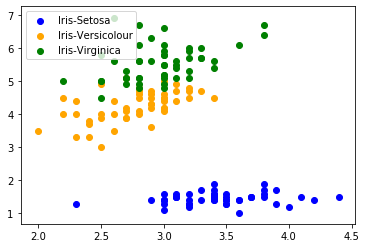

In [542]:
Y3 = df.dot(eigenvectors[:, 3]) # projection on the largest eigenvector
Y2 = df.dot(eigenvectors[:, 2]) # projection on the second eigenvector
Y1 = df.dot(eigenvectors[:, 1]) # projection on the third eigenvector

plt.scatter(Y1[0:50], Y2[0:50], c = 'blue')
plt.scatter(Y1[50:100], Y2[50:100], c = 'orange')
plt.scatter(Y1[100:150], Y2[100:150], c = 'green')
plt.legend(loc='upper left', labels=['Iris-Setosa', 'Iris-Versicolour', 'Iris-Virginica'])
#plt.scatter(Y1, Y3)

plt.draw()

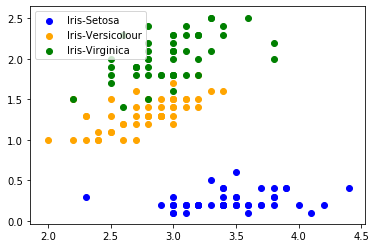

In [543]:
plt.scatter(Y1[0:50], Y3[0:50], c = 'blue')
plt.scatter(Y1[50:100], Y3[50:100], c = 'orange')
plt.scatter(Y1[100:150], Y3[100:150], c = 'green')
plt.legend(loc='upper left', labels=['Iris-Setosa', 'Iris-Versicolour', 'Iris-Virginica'])

plt.draw()

In [544]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)

In [545]:
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2', 'principal component 3'])
#finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
#finalDf.head(5)
principalDf

,principal component 1,principal component 2,principal component 3
0,-2.264703,0.480027,-0.127706
1,-2.080961,-0.674134,-0.234609
2,-2.364229,-0.341908,0.044201
3,-2.299384,-0.597395,0.091290
4,-2.389842,0.646835,0.015738
...,...,...,...
145,1.870503,0.386966,0.256274
146,1.564580,-0.896687,-0.026371
147,1.521170,0.269069,0.180178
148,1.372788,1.011254,0.933395


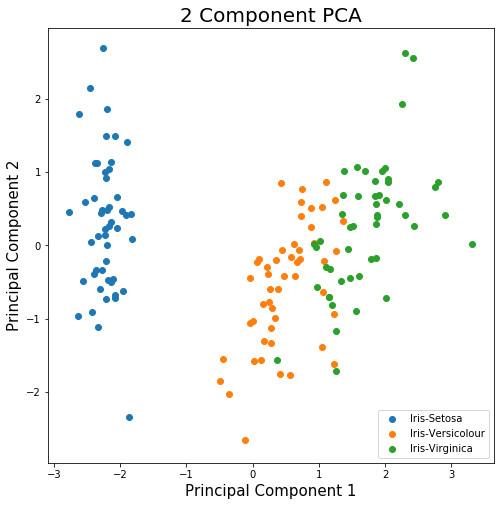

In [546]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

ax.scatter(principalDf['principal component 1'][0:50], principalDf['principal component 2'][0:50])
ax.scatter(principalDf['principal component 1'][50:100], principalDf['principal component 2'][50:100])
ax.scatter(principalDf['principal component 1'][100:150], principalDf['principal component 2'][100:150])

ax.legend(loc='lower right', labels=['Iris-Setosa', 'Iris-Versicolour', 'Iris-Virginica'])


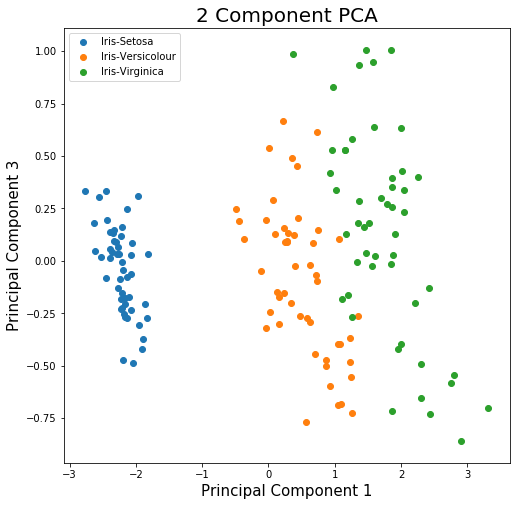

In [547]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

ax.scatter(principalDf['principal component 1'][0:50], principalDf['principal component 3'][0:50])
ax.scatter(principalDf['principal component 1'][50:100], principalDf['principal component 3'][50:100])
ax.scatter(principalDf['principal component 1'][100:150], principalDf['principal component 3'][100:150])

ax.legend(loc='upper left', labels=['Iris-Setosa', 'Iris-Versicolour', 'Iris-Virginica'])

Q2

In [548]:
#chi-square plot method
P1 = df[0:50]
P1[:1]

,Sepal length,Sepal width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2


In [549]:
mu_1 = np.average(P1, axis=0)
print(mu_1)

[5.006 3.428 1.462 0.246]


In [550]:
sigma_1 = np.cov(P1.T)
print(sigma_1)

[[0.12424898 0.09921633 0.0163551  0.01033061]
 [0.09921633 0.1436898  0.01169796 0.00929796]
 [0.0163551  0.01169796 0.03015918 0.00606939]
 [0.01033061 0.00929796 0.00606939 0.01110612]]


In [551]:
#np.linalg.eigh(sigma_1)[0]

In [552]:
# eigenvectors
#print('eigenvalue', np.linalg.eigh(sigma_1)[0][0], 'has eigenvector', np.linalg.eigh(sigma_1)[1][:, 0])
#print('eigenvalue', np.linalg.eigh(sigma_1)[0][1], 'has eigenvector', np.linalg.eigh(sigma_1)[1][:, 1])
#print('eigenvalue', np.linalg.eigh(sigma_1)[0][2], 'has eigenvector', np.linalg.eigh(sigma_1)[1][:, 2])
#print('eigenvalue', np.linalg.eigh(sigma_1)[0][3], 'has eigenvector', np.linalg.eigh(sigma_1)[1][:, 3])

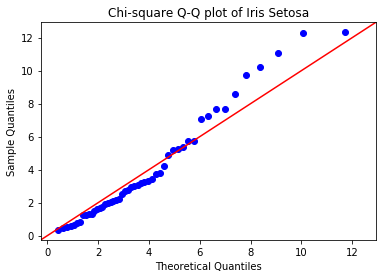

In [553]:
p = 4
n = 50
generalized_square_distances = []
for i in range(n):
    x_i = P1.values[i,:]
    generalized_square_distances.append((x_i - mu_1).T @ np.linalg.inv(sigma_1) @ (x_i - mu_1))

sorted(generalized_square_distances)

fig = sm.qqplot(np.array(generalized_square_distances), line='45', dist=distributions.chi2, distargs=(p, ))
plt.title("Chi-square Q-Q plot of Iris Setosa")
plt.show()

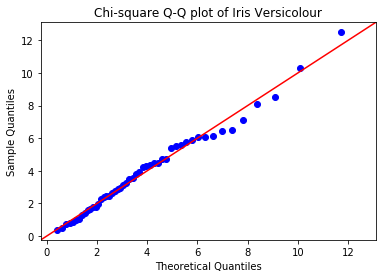

In [554]:
P2 = df[50:100]

mu_2 = np.average(P2, axis=0)

sigma_2 = np.cov(P2.T)

p = 4
n = 50
generalized_square_distances = []
for i in range(n):
    x_i = P2.values[i,:]
    generalized_square_distances.append((x_i - mu_2).T @ np.linalg.inv(sigma_2) @ (x_i - mu_2))


sorted(generalized_square_distances)

fig = sm.qqplot(np.array(generalized_square_distances), line='45', dist=distributions.chi2, distargs=(p, ))
plt.title("Chi-square Q-Q plot of Iris Versicolour")
plt.show()

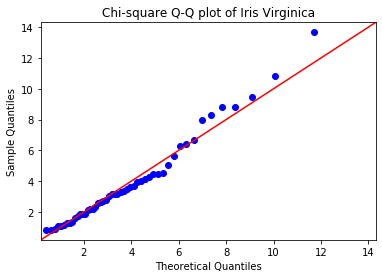

In [555]:
P3 = df[100:150]

mu_3 = np.average(P3, axis=0)

sigma_3 = np.cov(P3.T)


p = 4
n = 50
generalized_square_distances = []
for i in range(n):
    x_i = P3.values[i,:]
    generalized_square_distances.append((x_i - mu_3).T @ np.linalg.inv(sigma_3) @ (x_i - mu_3))


sorted(generalized_square_distances)

fig = sm.qqplot(np.array(generalized_square_distances), line='45', dist=distributions.chi2, distargs=(p, ))
plt.title("Chi-square Q-Q plot of Iris Virginica")
plt.show()

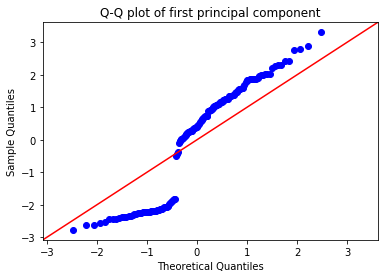

In [556]:
#PCA method
sorted(principalDf['principal component 1'])

fig = sm.qqplot(np.array(principalDf['principal component 1']), line='45', dist=distributions.norm)
plt.title("Q-Q plot of first principal component")
plt.show()

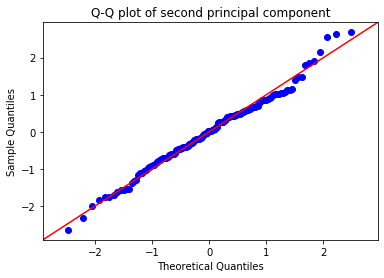

In [557]:
fig = sm.qqplot(np.array(principalDf['principal component 2']), line='45', dist=distributions.norm)
plt.title("Q-Q plot of second principal component")
plt.show()

In [558]:
#fig = sm.qqplot(np.array(principalDf['principal component 3']), line='45', dist=distributions.norm)
#plt.show()

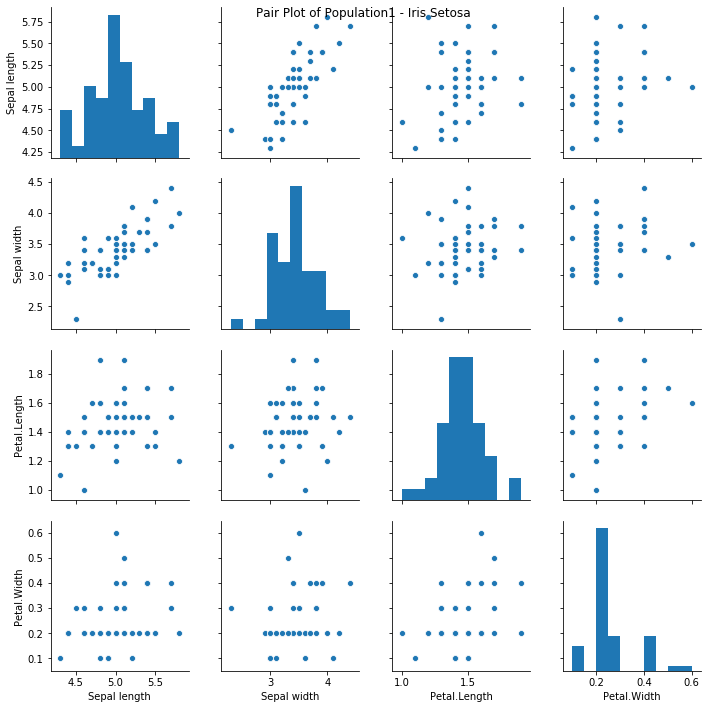

In [559]:
sns.pairplot(P1)
plt.suptitle('Pair Plot of Population1 - Iris Setosa');

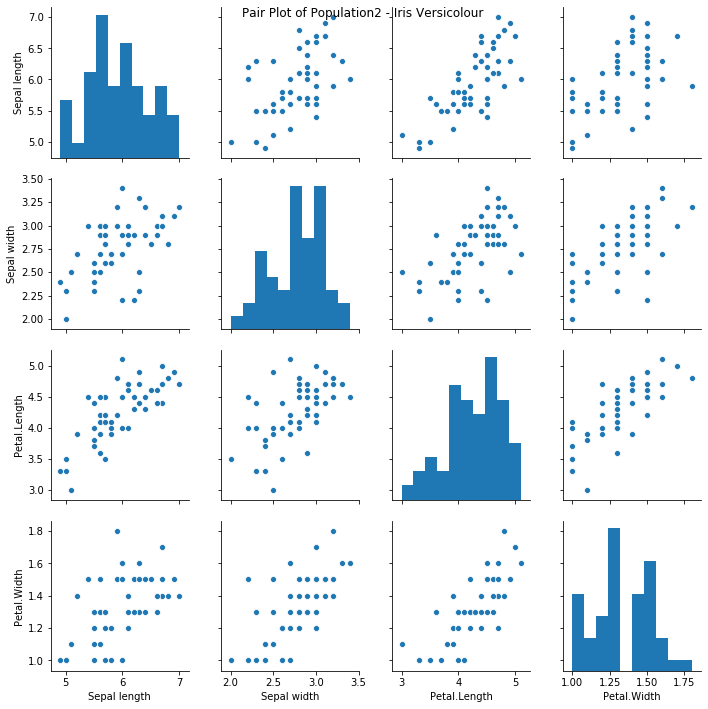

In [560]:
sns.pairplot(P2)
plt.suptitle('Pair Plot of Population2 - Iris Versicolour');

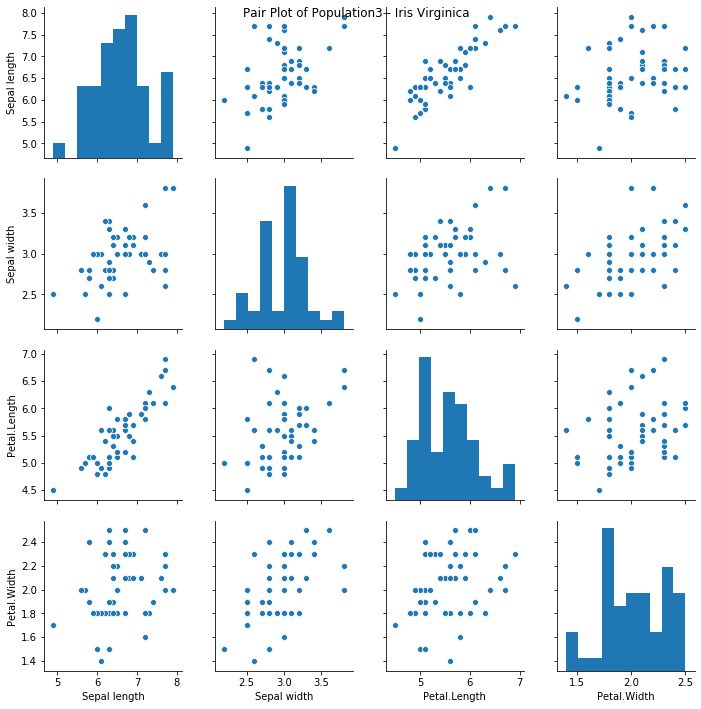

In [561]:
sns.pairplot(P3)
plt.suptitle('Pair Plot of Population3 - Iris Virginica');

Q3.

In [562]:
p =4
g =3
#df
mu = np.average(df, axis=0)
#mu
sigma = np.cov(df.T)
#P1 = df[0:50]
#P2 = df[50:100]
#P3 = df[100:150]

In [563]:
mu_p1 = np.average(P1, axis=0)
sigma_p1 = np.cov(P1.T)

mu_p2 = np.average(P2, axis=0)
sigma_p2 = np.cov(P2.T)

mu_p3 = np.average(P3, axis=0)
sigma_p3 = np.cov(P3.T)

In [564]:
#SS_tre d.f = g-1 = 2
50*np.outer((mu_p1 - mu),(mu_p1 - mu))
50*np.outer((mu_p2 - mu),(mu_p2 - mu))
50*np.outer((mu_p3 - mu),(mu_p3 - mu))
matrix_B = 50*np.outer((mu_p1 - mu),(mu_p1 - mu)) + 50*np.outer((mu_p2 - mu),(mu_p2 - mu)) + 50*np.outer((mu_p3 - mu),(mu_p3 - mu))
print(matrix_B)

[[ 63.21213333 -19.95266667 165.2484      71.27933333]
 [-19.95266667  11.34493333 -57.2396     -22.93266667]
 [165.2484     -57.2396     437.1028     186.774     ]
 [ 71.27933333 -22.93266667 186.774       80.41333333]]


In [565]:
#SS_res d.f = 150 - g = 147
#print(np.outer(P1.values[1] - mu_p1, P1.values[1] - mu_p1))
(P1.values[1] - mu_p1) @ (P1.values[1] - mu_p1).T
res_group1 = sum([np.outer(P1.values[i] - mu_p1, P1.values[i] - mu_p1) for i in range(50)])
res_group2 = sum([np.outer(P2.values[i] - mu_p2, P2.values[i] - mu_p2) for i in range(50)])
res_group3 = sum([np.outer(P3.values[i] - mu_p3, P3.values[i] - mu_p3) for i in range(50)])
matrix_W = res_group1 + res_group2 + res_group3
print(matrix_W)

[[38.9562 13.63   24.6246  5.645 ]
 [13.63   16.962   8.1208  4.8084]
 [24.6246  8.1208 27.2226  6.2718]
 [ 5.645   4.8084  6.2718  6.1566]]


In [566]:
np.linalg.det(matrix_W)
np.linalg.det(matrix_B + matrix_W)
wilks_lambda = np.linalg.det(matrix_W)/np.linalg.det(matrix_B + matrix_W)
wilks_lambda

F = ((1 - np.sqrt(wilks_lambda))/np.sqrt(wilks_lambda) ) * (150 - 4 - 2) / 4
F

199.1453435400827

In [567]:
f.ppf(0.9,8,288)
#199 > 1.69 reject H0

1.6916332614240592

Q4

In [568]:
Sepal_width = df['Sepal width']
Sepal_width

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: Sepal width, Length: 150, dtype: float64

In [569]:
p1_sepal = Sepal_width[0:50]

mu_p1_sepal = np.average(p1_sepal, axis=0)
sigma_p1_sepal = np.cov(p1_sepal.T)

p2_sepal = Sepal_width[50:100]
mu_p2_sepal = np.average(p2_sepal, axis=0)
sigma_p2_sepal = np.cov(p2_sepal.T)

p3_sepal = Sepal_width[100:150]
mu_p3_sepal = np.average(p3_sepal, axis=0)
sigma_p3_sepal = np.cov(p3_sepal.T)

In [570]:
mu_sepal = np.average(Sepal_width, axis=0)
print(mu_sepal) 

sigma_sepal = np.cov(Sepal_width.T)
print(sigma_sepal)

3.0573333333333337
0.189979418344519


In [571]:
#ss_tre
mu_p1_sepal - mu_sepal
np.square(mu_p1_sepal - mu_sepal)
print(50*np.square(mu_p1_sepal - mu_sepal))

mu_p2_sepal - mu_sepal
np.square(mu_p2_sepal - mu_sepal)
print(50*np.square(mu_p2_sepal - mu_sepal))

mu_p3_sepal - mu_sepal
np.square(mu_p3_sepal - mu_sepal)
print(50*np.square(mu_p3_sepal - mu_sepal))

ss_tre = 50*(mu_p1_sepal - mu_sepal)**2 + 50*(mu_p2_sepal - mu_sepal)**2 + 50*(mu_p3_sepal - mu_sepal)**2
print(ss_tre)

6.869688888888874
4.128022222222219
0.3472222222222235
11.344933333333316


In [572]:
#ss_res
ss_res = sum([(p1_sepal[i] - mu_p1_sepal)**2 for i in range(50)]) + sum([(p2_sepal[i+50] - mu_p2_sepal)**2 for i in range(50)]) +sum([(p3_sepal[i+100] - mu_p3_sepal)**2 for i in range(50)]) 
print(ss_res)

16.962000000000003


In [573]:
degrees_of_freedom_SS_res = 150 - 3
degrees_of_freedom_SS_in_between = 3 - 1

ss_res/degrees_of_freedom_SS_res, ss_tre/degrees_of_freedom_SS_in_between

(0.11538775510204084, 5.672466666666658)

In [574]:
F = (ss_tre/degrees_of_freedom_SS_in_between) / (ss_res/degrees_of_freedom_SS_res) 
F

49.16004008961199

In [575]:
f.ppf(0.9,2,147) 
#49.16 > 2.34 reject H0

2.339032030837414

Q5

In [576]:
#component1 Sepal length
Sepal_length_group1 = P1["Sepal length"]
Sepal_length_group2 = P2["Sepal length"]
Sepal_length_group3 = P3["Sepal length"]

mu_Sepal_length_group1 = np.average(Sepal_length_group1, axis=0)
mu_Sepal_length_group2 = np.average(Sepal_length_group2, axis=0)
mu_Sepal_length_group3 = np.average(Sepal_length_group3, axis=0)

alpha = 0.1
p = 4
g = 3
n = 150

quantile = t.ppf(1-alpha/(p*g*(g-1)), n-g)
#quantile
#1-2
lower_bound = mu_Sepal_length_group2 - mu_Sepal_length_group1 - quantile*np.sqrt((1/50 + 1/50)*(38.9562/147))
upper_bound = mu_Sepal_length_group2 - mu_Sepal_length_group1 + quantile*np.sqrt((1/50 + 1/50)*(38.9562/147))
print(lower_bound,upper_bound)
#2-3
lower_bound = mu_Sepal_length_group3  - mu_Sepal_length_group2 - quantile*np.sqrt((1/50 + 1/50)*(38.9562/147))
upper_bound = mu_Sepal_length_group3  - mu_Sepal_length_group2 + quantile*np.sqrt((1/50 + 1/50)*(38.9562/147))
print(lower_bound,upper_bound)
#1-3
lower_bound = mu_Sepal_length_group3  - mu_Sepal_length_group1 - quantile*np.sqrt((1/50 + 1/50)*(38.9562/147))
upper_bound = mu_Sepal_length_group3  - mu_Sepal_length_group1 + quantile*np.sqrt((1/50 + 1/50)*(38.9562/147))
print(lower_bound,upper_bound)

#component2 Sepal width
Sepal_width_group1 = P1["Sepal width"]
Sepal_width_group2 = P2["Sepal width"]
Sepal_width_group3 = P3["Sepal width"]

mu_Sepal_width_group1 = np.average(Sepal_width_group1, axis=0)
mu_Sepal_width_group2 = np.average(Sepal_width_group2, axis=0)
mu_Sepal_width_group3 = np.average(Sepal_width_group3, axis=0)
#1-2
lower_bound = mu_Sepal_width_group2 - mu_Sepal_width_group1 - quantile*np.sqrt((1/50 + 1/50)*(16.962/147))
upper_bound = mu_Sepal_width_group2 - mu_Sepal_width_group1 + quantile*np.sqrt((1/50 + 1/50)*(16.962/147))
print(lower_bound,upper_bound)
#2-3
lower_bound = mu_Sepal_width_group3 - mu_Sepal_width_group2 - quantile*np.sqrt((1/50 + 1/50)*(16.962/147))
upper_bound = mu_Sepal_width_group3 - mu_Sepal_width_group2 + quantile*np.sqrt((1/50 + 1/50)*(16.962/147))
print(lower_bound,upper_bound)
#1-3
lower_bound = mu_Sepal_width_group3 - mu_Sepal_width_group1 - quantile*np.sqrt((1/50 + 1/50)*(16.962/147))
upper_bound = mu_Sepal_width_group3 - mu_Sepal_width_group1 + quantile*np.sqrt((1/50 + 1/50)*(16.962/147))
print(lower_bound,upper_bound)

#component3 Petal.Length
Petal_Length_group1 = P1["Petal.Length"]
Petal_Length_group2 = P2["Petal.Length"]
Petal_Length_group3 = P3["Petal.Length"]

mu_Petal_Length_group1 = np.average(Petal_Length_group1, axis=0)
mu_Petal_Length_group2 = np.average(Petal_Length_group2, axis=0)
mu_Petal_Length_group3 = np.average(Petal_Length_group3, axis=0)
#1-2
lower_bound = mu_Petal_Length_group2 - mu_Petal_Length_group1 - quantile*np.sqrt((1/50 + 1/50)*(27.2226 /147))
upper_bound = mu_Petal_Length_group2 - mu_Petal_Length_group1 + quantile*np.sqrt((1/50 + 1/50)*(27.2226 /147))
print(lower_bound,upper_bound)
#2-3
lower_bound = mu_Petal_Length_group3 - mu_Petal_Length_group2 - quantile*np.sqrt((1/50 + 1/50)*(27.2226 /147))
upper_bound = mu_Petal_Length_group3 - mu_Petal_Length_group2 + quantile*np.sqrt((1/50 + 1/50)*(27.2226 /147))
print(lower_bound,upper_bound)
#1-3
lower_bound = mu_Petal_Length_group3 - mu_Petal_Length_group1 - quantile*np.sqrt((1/50 + 1/50)*(27.2226 /147))
upper_bound = mu_Petal_Length_group3 - mu_Petal_Length_group1 + quantile*np.sqrt((1/50 + 1/50)*(27.2226 /147))
print(lower_bound,upper_bound)

#component4 Petal.Width
Petal_Width_group1 = P1["Petal.Width"]
Petal_Width_group2 = P2["Petal.Width"]
Petal_Width_group3 = P3["Petal.Width"]

mu_Petal_Width_group1 = np.average(Petal_Width_group1, axis=0)
mu_Petal_Width_group2 = np.average(Petal_Width_group2, axis=0)
mu_Petal_Width_group3 = np.average(Petal_Width_group3, axis=0)
#1-2
lower_bound = mu_Petal_Width_group2 - mu_Petal_Width_group1 - quantile*np.sqrt((1/50 + 1/50)*(6.1566/147))
upper_bound = mu_Petal_Width_group2 - mu_Petal_Width_group1 + quantile*np.sqrt((1/50 + 1/50)*(6.1566/147))
print(lower_bound,upper_bound)
#2-3
lower_bound = mu_Petal_Width_group3 - mu_Petal_Width_group2 - quantile*np.sqrt((1/50 + 1/50)*(6.1566/147))
upper_bound = mu_Petal_Width_group3 - mu_Petal_Width_group2 + quantile*np.sqrt((1/50 + 1/50)*(6.1566/147))
print(lower_bound,upper_bound)
#1-3
lower_bound = mu_Petal_Width_group3 - mu_Petal_Width_group1 - quantile*np.sqrt((1/50 + 1/50)*(6.1566/147))
upper_bound = mu_Petal_Width_group3 - mu_Petal_Width_group1 + quantile*np.sqrt((1/50 + 1/50)*(6.1566/147))
print(lower_bound,upper_bound)

0.654646110221176 1.2053538897788234
0.37664611022117467 0.927353889778822
1.3066461102211744 1.8573538897788218
-0.8396943622645519 -0.4763056377354471
0.022305637735447387 0.3856943622645521
-0.6356943622645521 -0.27230563773544736
2.567819927026184 3.0281800729738153
1.061819927026185 1.5221800729738164
3.859819927026184 4.320180072973815
0.9705354763538886 1.1894645236461112
0.5905354763538891 0.8094645236461117
1.6705354763538889 1.8894645236461116


Q6

In [577]:
p = 4

overall_mean = np.average(df, axis=0)

Sigma = np.cov(df.T)

populations = ["Iris A", "Iris B", "Iris C"]
g = len(populations)


population_sizes = {
    "Iris A": 50,   
    "Iris B": 50,  
    "Iris C": 50
}

treatment_effects_H0 = {
     "Iris A": np.array([0.0, 0.0, 0.0, 0.0]),
     "Iris B": np.array([0.0, 0.0, 0.0, 0.0]),
     "Iris C": np.array([0.0, 0.0, 0.0, 0.0]),
}

def generate_dataset(treatment_effects):
    observations = {}
    for l in populations:
        observations[l] = np.random.multivariate_normal(overall_mean + treatment_effects[l],\
                                       Sigma,
                                       size=population_sizes[l])
    return observations

In [578]:
total_sample_size = sum(population_sizes.values())
total_sample_size

150

In [579]:
number_of_simulations = 10000

all_simulations = []
    
for s in range(number_of_simulations):
    observations = generate_dataset(treatment_effects_H0)
    hypothesis = 'H0'
    
    overall_empirical_mean = sum([sum(observations[l]) for l in populations])/total_sample_size
    empirical_means_within_populations = {}
    for l in populations:
        empirical_means_within_populations[l] = sum(observations[l])/population_sizes[l]
    # residuals
    matrix_W = sum([ np.outer(observations[l][i,]-empirical_means_within_populations[l],
                          observations[l][i,]-empirical_means_within_populations[l])
                     for l in populations
                     for i in range(population_sizes[l])
                   ])
    # treatment matrix
    matrix_B = sum([ population_sizes[l] * \
                 np.outer(overall_empirical_mean-empirical_means_within_populations[l],
                          overall_empirical_mean-empirical_means_within_populations[l])
                     for l in populations
                   ])
    wilks_lambda = np.linalg.det(matrix_W) / np.linalg.det(matrix_B + matrix_W)
    all_simulations.append({
                          'wilks lambda':wilks_lambda,
                          'det(W)' : np.linalg.det(matrix_W),
                          'det(W+B)': np.linalg.det(matrix_B+matrix_W),
                          'hypothesis': hypothesis
                         })

In [580]:
df = pd.DataFrame(all_simulations)
df.head()

,wilks lambda,det(W),det(W+B),hypothesis
0,0.965901,1.022331e+06,1.058422e+06,H0
1,0.922205,5.872726e+05,6.368133e+05,H0
2,0.942287,8.058330e+05,8.551884e+05,H0
3,0.953112,9.567973e+05,1.003866e+06,H0
4,0.970888,8.209352e+05,8.455509e+05,H0


In [581]:
F_values_fail_to_reject_H0 = 0
F_values_reject_H0 = 0

for simulation in all_simulations:
    wilks_lambda = simulation['wilks lambda']
    F = ((1 - np.sqrt(wilks_lambda))/np.sqrt(wilks_lambda) ) * (total_sample_size - p - 2) / p
    if F < f.ppf(0.9,8,288):
        F_values_fail_to_reject_H0 +=1
    else:
        F_values_reject_H0 += 1

In [582]:
print(F_values_fail_to_reject_H0)
print(F_values_reject_H0)

8971
1029
